<a href="https://colab.research.google.com/github/gelgel5633/self-study/blob/main/%ED%95%84%EC%82%AC/Natural_Language_Processing_with_Disaster_Tweets1_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 출처
- competition : https://www.kaggle.com/competitions/nlp-getting-started
- 노트북 링크 : https://www.kaggle.com/code/parulpandey/getting-started-with-nlp-a-general-intro/notebook

# NLP 시작하기
### 소개
- __주요 목표__ : 이 노트북은 내가 작성한 NLP 노트북 시작하기의 첫번째 파트입니다. 이 노트북은 현재 competition과 관련된 nlp의 개념을 설명합니다. nlp는 인간의 언어와 컴퓨터 간의 상호 작용에 초점을 맞춘 연구 분야입니다. nlp는 컴퓨터 과학, 인공 지능 및 계산 언어학의 교차점에 놓여 있습니다. nlp는 컴퓨터가 똑똑하고 유용한 방식으로 인간 언어에서 의미를 분석, 이해 및 파생시키는 방법 입니다.

- __노트북의 시리즈__ 는 다음과 같습니다. 
 - 1. 현재 노트북
 - 2.  https://www.kaggle.com/code/parulpandey/getting-started-with-nlp-feature-vectors?scriptVersionId=34732054

텍스트 처리를 기반으로 한 또다른 노트북은 기본 전처리 및 Tweet sentiment 추출 기반 EDA입니다.

## 데이터셋
데이터 세트에는 훈련 세트와 테스트 세트로 나누어진 트윗 세트가 포함되어 있습니다. 훈련세트에는 트윗이 실제 재해와 관련이 있는지 여부를 식별하는 대상 열이 포함되어 있습니다.

우리의 목표는 테스트 세트 트윗이 재해에 속하는지 여부를 1또는 0의 형태로 예측하는 ML모델을 만드는 것입니다. 이것은 이진분류의 전형적인 사례입니다.

## 평가 지표에 대한 이해
평가 지표는 통계 또는 기계 학습의 모델의 품질을 측정하는 데 사용됩니다. 모델을 테스트하는데 사용할 수 있는 다양한 유형의 평가 지표가 있습니다. 여기에는 분류 정확도, 로그 손실 등이 포함됩니다. 이 부분에서 예상 답변과 실제 답변 사이에 F! score를 사용하여 제출물을 평가합니다


F score은 F1 score 또는 F 측정이라 불리는데 이는 테스트의 정확도를 측정한 것입니다. F 점수는 테스트의 정밀도와 재현율의 가중 조화평균으로 정의됩니다.

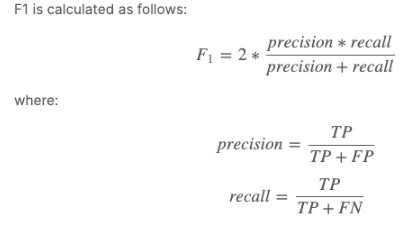

정밀도는 모델이 True라고 예측한 것 중에서 실제로 True인 비율입니다

재현율은 실제 True값들 중에서 모델이 True라고 예측한 것의 비율입니다.

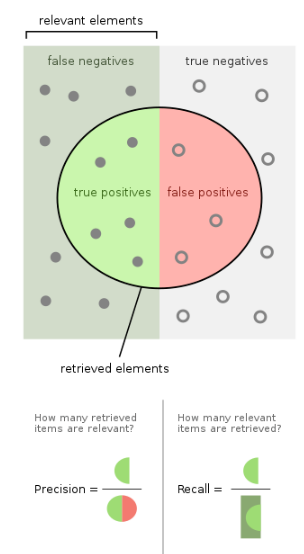

출처 : https://en.wikipedia.org/wiki/Precision_and_recall

F 점수는 1의 값에서 완벽한 정밀도와 재현율을 의미하는 최상의 값에 도달합니다. 가장 낮은 정밀도와 가장 낮은 재현율을 의미하는 최악의 F 점수는 0이 됩니다.

### 왜 유용한가?
F 점수는 테스트의 정확도를 측정하는 데 사용되며 정확도와 재현율 사용의 균형을 맞춥니다. F 점수는 정밀도와 재현율을 모두 사용하여 테스트 성능에 대한 보다 현실적인 측정값을 제공할 수 있습니다.  
F 점수는 검색, 문서 분류 및 쿼리 분류 성능을 측정하기 위한 정보 검색에 자주 사용됩니다.  
출처 : https://deepai.org/machine-learning-glossary-and-terms/f-score

# 컨텐츠 목록
- 1. 필요 라이브러리 추출
- 2. 데이터셋 읽기
- 3. 기초 EDA
- 4. 텍스트 전처리
- 5. 토큰을 벡터로 변환
- 6. 텍스트 분류모델 제작

# 1. 필요 라이브러리 추출

In [ ]:
import numpy as np 
import pandas as pd 

# 텍스트 전처리 라이브러리
import re
import string
import nltk
from nltk.corpus import stopwords

# XGBoost
import xgboost as xgb
from xgboost import XGBClassifier

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

# 파일 시스템 관리
import os

# 오류 억제
import warnings
warnings.filterwarnings('ignore')

# 2.데이터셋 읽기

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/transcription/Natural Language Processing with Disaster Tweets/train.csv")
print("Training data shape : ", train.shape)
train.head()

Training data shape :  (7613, 5)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


train 데이터는 7613개가 있고 타겟(label)을 포함해서 다섯 개의 특정이 있습니다

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/transcription/Natural Language Processing with Disaster Tweets/test.csv")
print("testing data shape : ", test.shape)
test.head()

testing data shape :  (3263, 4)


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


명심해야 할 것은 테스트 데이터는 타겟 column이 없습니다

# 3.기초 EDA

결측값

In [ ]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

열은 다음을 나타냅니다
- 트윗의 텍스트
- 해당 트윗의 키워드
- 트윗을 보낸 위치

In [ ]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

train과 test에서 많은 결측치가 location column에 있습니다

## 타겟 column에 대한 탐색
- 타겟 column의 분포
주어진 트윗이 실제 재난에 관한 것인지 여부를 예측해야 합니다. 그렇다면 1을 예측하고, 그렇지 않으면 0을 예측하여야 합니다

In [ ]:
train["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

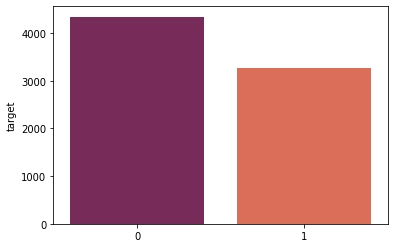

In [ ]:
sns.barplot(train["target"].value_counts().index, train["target"].
            value_counts(), palette = "rocket")

- 재난 트윗과 비재난 트윗이 어떻게 보이는지 살펴보겠습니다

In [ ]:
disaster_tweets = train[train["target"] == 1]["text"]
disaster_tweets.values[1]

'Forest fire near La Ronge Sask. Canada'

In [ ]:
non_disaster_tweets = train[train["target"] ==0]["text"]
non_disaster_tweets.values[1]

'I love fruits'

### "keyword" column 에 대한 탐색
keyword column은 트윗에 대한 키워드를 나타냅니다. train data에서 상위 20개의 키워드를 확인해봅시다

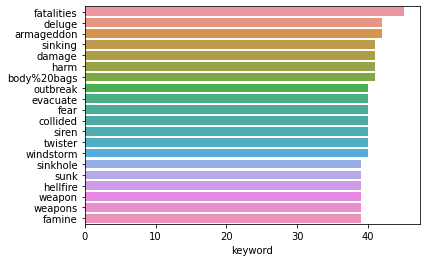

In [ ]:
sns.barplot(y = train["keyword"].value_counts()[:20].
            index, x = train["keyword"].value_counts()[:20],
            orient = "h")

데이터 세트에 재해라는 단어가 얼마나 자주 등장하는지, 그리고 이것이 트윗이 재해범주에 속하는지 여부를 결정하는 데 도움이 되는지 확인해봅시다

In [ ]:
train.loc[train["text"].str.
          contains("disaster", na=False, case = False)].target.value_counts()

1    102
0     40
Name: target, dtype: int64

dataframe.str에 다양한 기능이 존재
- .str[슬라이싱 할 번호] 를 통해 특정 단어만 추출 가능
- .str.split(" ")으로 공백에 대한 분리가 가능
- .str.startswith("시작단어")를 통해 시작 단어와 일치하는 항목만 추출 가능
- .str.contains("단어") 를 통해 True or False를 반환
- .str.replace("찾을 단어", "대체할 단어")로 대체 가능
- .str.pad 를 통해 글자 수를 맞추는 방법도 사용 가능
- 위의 경우 외에도 lower upper find findall(정규표현식) 등 사용가능
출처 : https://yganalyst.github.io/data_handling/memo_9/

## location column에 대한 탐색
비록 location에 많은 결측값이 있지만 데이터 세트에 있는 상위 20개 위치를 보겠습니다. 일부 위치가 반복되기 떄문에 cleaning이 필요합니다

In [ ]:
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

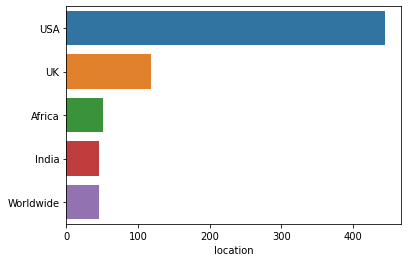

In [ ]:
sns.barplot(y = train["location"].value_counts()[:5].index, x = train["location"].value_counts()[:5],
            orient = "h")

# 4. 텍스트 전처리
## 1. 데이터 클리닝
NLP 프로젝트를 시작하기 전에 데이터를 전처리하여 모든 데이터를 일관된 형식으로 가져와야 합니다. 데이터를 정리하고 토큰화하고 행렬(매트릭스)로 변환해야 합니다. 기본 텍스트 전처리 기술 중 일부는 다음과 같습니다.  
- 동일한 단어를 다른 단어로 취급하지 않도록 텍스트를 모두 소문자 또는 대문자로 만듭니다.
- 노이즈 제거 : 표준 문자나 숫자가 아닌 것(예 : 구둣점), 숫자값, 일반적인 의미가 없는 텍스트(예 : \n)
- 토큰화 : 토큰화는 일반 텍스트 문자열을 우리가 실제로 원하는 단어로 변환하는 프로세스를 설명하는 데 사용되는 용어일 뿐입니다. 문장 토크나이저는 문장 목록을 찾는 데 사용할 수 있고 word 토크나이저는 문자열에서 단어 목록을 찾는 데 사용할 수 있습니다.
- 불용어 제거 : 때로는 사용자 요구에 맞는 문서를 선택하는 데 거의 도움이 되지않는 매우 일반적인 단어가 어휘에서 완전히 제외되는데 이를 불용어라고 합니다.


### 토큰화 이후 추가 데이터 정리 단계:
- 형태소 분석(stemming) : 형태소 분석은 어간, 어근 또는 어근 형태로 변형된 단어를 줄이는 과정입니다. 예를 들어 stems, stemming , stemmed는 stem이라는 단일 단어입니다.
- 표제어 추출(Lemmatization) : 표제어 추출은 형태소 분석에서 약간의 변형이 된 것입니다. 차이점은 형태소는 종종 존재하지 않는 단어를 생성할 수 있지만 표제어 추출은 실제 단어라는 것입니다. 형태소의 뿌리는 사전에서만 찾을 수 있는 것이 아니라 표제어에서 찾을 수 있습니다. 표제어 추출에서의 예시는 run이 running 또는 ran과 동일한 표제어이고, better과 good이라는 단어가 동일한 표제어 이므로 동일한 것으로 간주됩니다. 
- 품사 태깅
- bi-gram, tri-gram(두 단어, 세 단어) 혹은 이보다 더...
 

하지만 이러한 단계를 모두 사용해야 하는 것은 아닙니다. 사용법은 당면한 문제에 따라 다르고, 때로는 불용어를 제거하는 것이 도움이 되지만 도움이 되지 않는 경우도 있습니다.  
다음은 블로그에서 가져온 표입니다.  
제목 : All you need to know about Text Preprocessing for Machine Learning &NLP  
 링크 : https://kavita-ganesan.com/text-preprocessing-tutorial/#.Xi2BhhczZTY

텍스트 데이터에 대해 얼마나 많은 전처리를 수행해야하는지 요약한 것입니다

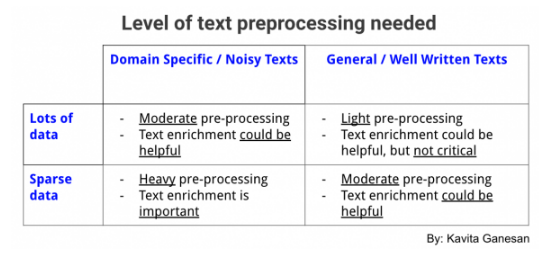

In [ ]:
train["text"][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [ ]:
def clean_text(text):
    '''
    텍스트를 소문자화하고, 대괄호안에있는 문자를 지우고, 링크를 지우고, 구둣점을 지우고, 숫자를 포함한 문자를 제거합니다.
    '''
    text = text.lower()
    # . = 모든문자, * = 0개이상, ? = 문자가 있거나 없거나
    text = re.sub("\[.*?\]", '', text)
    # \S = whitespace 가 아닌 것과 매치
    text = re.sub("https?://\S+|www.\.\S+", '', text)
    # <>는 html태그 <header> 와 같은 것들을 제거하기 위함
    text = re.sub("<.*?>+", '', text)
    text = re.sub("[%s]" % re.escape(string.punctuation), '', text)
    text = re.sub("\n", '', text)
    # \w = 모든 영숫자, \d = 모든 십진 숫자(십진수)
    text = re.sub("\w*\d\w*", '', text)
    return text

train["text"] = train["text"].apply(lambda x: clean_text(x))
test["text"] = test["text"].apply(lambda x: clean_text(x))

train["text"].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

재미로 트윗에서 가장 지배적인 단어를 보기 위해 텍스트의 워드클라우드를 만들어봅시다

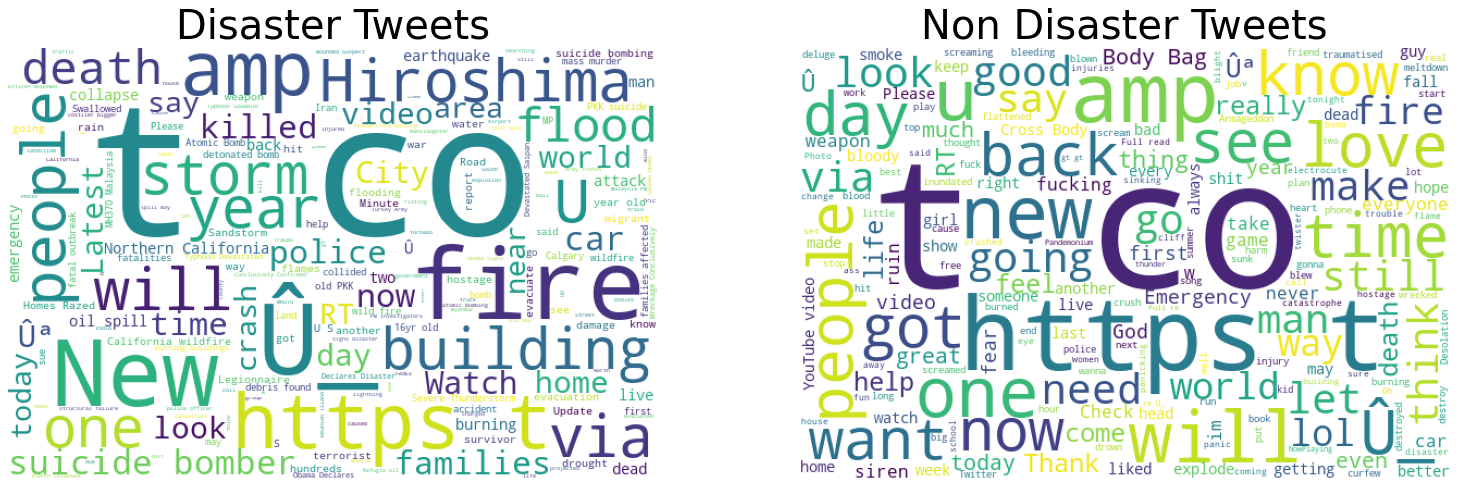

In [ ]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1,2, figsize = [26,8])
wordcloud1 = WordCloud(background_color = "white", width = 600, height = 400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis("off")
ax1.set_title("Disaster Tweets", fontsize = 40);

wordcloud2 = WordCloud(background_color = "white", width = 600, height = 400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis("off")
ax2.set_title("Non Disaster Tweets", fontsize = 40);

## 2.토큰화
토큰화는 토큰이 단어, 문장, 단란 등이 될 수 있는 토큰으로 입력 시퀀스를 분할하는 프로세스 입니다. 원하는 토큰 유형에 따라 토큰화는 다양한 유형이 될 수 있습니다.

In [ ]:
text = "Are you coming , aren't you"
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r"\w+")

print("예시 text : ", text)
print("=============================================================================")
print("whitespace tokenizer : ", tokenizer1.tokenize(text))
print("treebank tokenizer : ", tokenizer1.tokenize(text))
print("punctuation tokenizer : ", tokenizer1.tokenize(text))
print("regular expression tokenizer : ", tokenizer1.tokenize(text))

예시 text :  Are you coming , aren't you
whitespace tokenizer :  ['Are', 'you', 'coming', ',', "aren't", 'you']
treebank tokenizer :  ['Are', 'you', 'coming', ',', "aren't", 'you']
punctuation tokenizer :  ['Are', 'you', 'coming', ',', "aren't", 'you']
regular expression tokenizer :  ['Are', 'you', 'coming', ',', "aren't", 'you']


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")
train["text"] = train["text"].apply(lambda x: tokenizer.tokenize(x))
test["text"] = test["text"].apply(lambda x : tokenizer.tokenize(x))
train["text"].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

## 3.불용어 제거

매우 자주 발생하지만 a an the are 과 같이 값이 없는 단어를 제거합시다

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def remove_stopwords(text):
    """
    영어에 속해있는 불용어를 제거합니다
    """
    words = [w for w in text if w not in stopwords.words("english")]
    return words

train["text"] = train["text"].apply(lambda x: remove_stopwords(x))
test["text"] = test["text"].apply(lambda x: remove_stopwords(x))
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,"[deeds, reason, earthquake, may, allah, forgiv...",1
1,4,NaN,NaN,"[forest, fire, near, la, ronge, sask, canada]",1
2,5,NaN,NaN,"[residents, asked, shelter, place, notified, o...",1
3,6,NaN,NaN,"[people, receive, wildfires, evacuation, order...",1
4,7,NaN,NaN,"[got, sent, photo, ruby, alaska, smoke, wildfi...",1


## 4.토큰 정규화
토큰 정규화는 다른 토큰을 기본형식으로 변환하는 것을 의미합니다.
- 어간추출 : 단어의 어근을 얻기 위해 접미사를 제거하고 대체합니다. 이를 어간이라고 합니다(예: cats -> cat)
- 표제어추출 : 표제어라고 알려진 단어의 기초 또는 사전 형태를 반환합니다. 

In [ ]:
text = "feet cats wolves talked"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

stemmer = nltk.stem.PorterStemmer()
print("어간 추출한 문장 : ", " ".join(stemmer.stem(token) for token in tokens))

lemmatizer = nltk.stem.WordNetLemmatizer()
print("표제어 추출한 문장: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

어간 추출한 문장 :  feet cat wolv talk
표제어 추출한 문장:  foot cat wolf talked


어간 추출과 표제어 추출은 때때로 단어를 다듬고 싶지않고 원래 형태를 유지하기 때문에 결과를 반드시 향상시키지 않는 점을 유의하셔야 합니다. 따라서 어간추출과 표제어 추출은 문제마다 다르며, 여기에서는 이러한 방법을 사용하지 않습니다.

In [ ]:
def combine_text(list_of_text):
    """
    텍스트 목록을 가져와 하나의 큰 텍스트 덩어리로 결합합니다
    """
    combined_text = " ".join(list_of_text)
    return combined_text

train["text"]= train["text"].apply(lambda x : combine_text(x))
test["text"] = test["text"].apply(lambda x : combine_text(x))
train["text"]
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders cal...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


- 모든 것을 하나로 모으기 - 텍스트 전처리 기능
이것으로 전처리 부분을 마칩니다. 더 나은 재사용성을 위해 수행된 모든 단계를 함수로 변환하는 것이 현명할 것입니다

In [ ]:
def text_preprocessing(text):
    """
    텍스트를 정리하고 구문분석합니다
    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r"\w+")

    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words("english")]
    combined_text = " ".join(remove_stopwords)
    return combined_text

# 5.토큰을 벡터로 변환

초기 전처리 단계 이후 텍스트를 의미 있는 숫자 벡터(또는 배열)로 변환해야 합니다. 이것은 여러 기술로 수행할 수 있습니다.

### Bag of Words
bag of words는 문서 내에서 단어의 발생을 설명하는 텍스트 표현입니다. 여기에는 두 가지가 포함됩니다
- 알려진 단어의 어휘
- 알려진 단어의 존재를 측정  
왜 bag of words로 불릴까요? 문서에 있는 단어의 순서나 구조에 대한 정보는 모두 폐기되고 모델은 알려진 단어가 문서에서 발생하는 위치가 아니라 문서에서 발생하는지 여부에만 관심을 갖기 때문입니다.

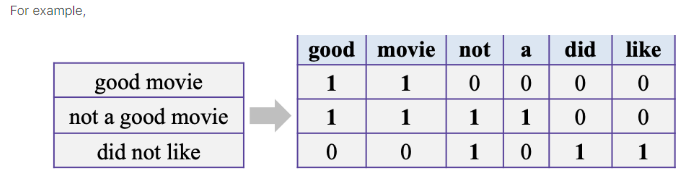

우린 scikit-learn의 CountVectorizer를 사용하여 이를 수행할 수 있습니다. 여기서 모든 행은 다른 트윗을 나타내고 모든 열은 다른 단어를 나타냅니다

### bag of words - countvectorizer 기능
Countvectorizer는 텍스트 문서 모음을 토큰 수의 행렬로 변환합니다. 여기서 CountVectorizer에는 전처리, 토큰화 및 단어 제거, 불용어 제거를 자동으로 수행하는 옵션이 제공된다는 점에 유의하여야 합니다. 하지만, 더 나은 이해를 위해 모든 프로세스를 수동으로 수행했습니다. 매개변수를 지정하지않고 countvectorizer의 기본 구현을 수행하겠습니다

In [ ]:
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train["text"])
test_vectors = count_vectorizer.transform(test["text"])

print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


### TFIDF 특징
bag of words 접근 방식의 문제는 문서에서 자주 사용되는 단어가 지배적이긴 하지만 정보 컨텐츠를 담고있지 않을 것입니다. 또한 짧은 문서보다 긴 문서에 더 많은 가중치를 부여합니다.  

한 가지 접근 방식은 모든 문서에서 자주 나타나는 ""와 같은 빈번한 단어에 대한 점수가 패널티를 받도록 모든 문서에 나타나는 빈도에 따라 단어의 빈도를 재조정하는 것입니다. 이러한 방식은 TF-IDF(빈도-역빈도) 라고 합니다.  

---

TF : 현재 문서에서 단어에 대한 빈도 점수 입니다   
TF = (현재 문서에서 등장하는 단어 t 의 수) / (문서에 있는 단어의 수)

---
IDF : 문서 전체에서 단어가 얼마나 희귀한지에 대한 점수입니다.  
IDF = 1+log(N/n)  
N은 전체 문서의 수이고, n은 단어 t가 들어있는 문서의 수입니다

___

In [ ]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5, ngram_range=(1,2))
train_tfidf = tfidf.fit_transform(train["text"])
test_tfidf = tfidf.transform(test["text"])

# 6.텍스트 분류모델 제작

데이터를 분류모델에 입력할 준비가 되었습니다. 일반적으로 사용되는 분류 알고리즘을 사용하여 기본 분류 모델을 만들고 모델의 성능을 살펴보겠습니다
### 선형회귀분류

In [ ]:
clf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf, train_vectors, train["target"], cv = 5, scoring = "f1")
scores

array([0.59865255, 0.49611063, 0.57166948, 0.56156716, 0.68789809])

In [ ]:
clf.fit(train_vectors, train["target"])

LogisticRegression()

In [ ]:
clf_tfidf = LogisticRegression(C=1.0)
scores = model_selection.cross_val_score(clf_tfidf, train_tfidf, train["target"], cv=5, scoring = "f1")
scores

array([0.57229525, 0.49673203, 0.54277829, 0.46618106, 0.64768683])

tfidf보다 countvectorizer가 더 나은 성능을 보입니다

### 나이브 베이즈 분류기
괜찮은 점수입니다. 테스트 데이터와 잘 작동하는 다른 모델인 Niave Bayes를 사용해 보겠습니다

In [ ]:
clf_NB = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB, train_vectors, train["target"], cv= 5, scoring="f1")
scores

array([0.63149079, 0.60675773, 0.68575519, 0.64341085, 0.72505092])

In [ ]:
clf_NB.fit(train_vectors, train["target"])

MultinomialNB()

In [ ]:
clf_NB_TFIDF = MultinomialNB()
scores = model_selection.cross_val_score(clf_NB_TFIDF, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.57590597, 0.57092511, 0.61135371, 0.5962963 , 0.7393745 ])

나이브베이즈에 TFIDF가 선형회귀모델 보다 더 나은 점수를 출력합니다

In [ ]:
clf_NB_TFIDF.fit(train_tfidf, train["target"])

MultinomialNB()

### XGBoost

In [ ]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(clf_xgb, train_vectors, train["target"], cv=5, scoring="f1")
scores

array([0.47431694, 0.37137331, 0.44134078, 0.39034627, 0.52298851])

In [ ]:
import xgboost as xgb
clf_xgb_TFIDF = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)
scores = model_selection.cross_val_score(clf_xgb_TFIDF, train_tfidf, train["target"], cv=5, scoring="f1")
scores

array([0.49173098, 0.32719836, 0.42613636, 0.41904762, 0.5265188 ])

## 제출하기

In [ ]:
def submission(submission_file_path, model, test_vectors):
    sample_submission = pd.read_csv(submission_file_path)
    sample_submission["target"]= model.predict(test_vectors)
    sample_submission.to_csv("submission.csv", index = False)

In [ ]:
submission_file_path = "/content/drive/MyDrive/transcription/Natural Language Processing with Disaster Tweets/sample_submission.csv"
test_vectors = test_tfidf
submission(submission_file_path, clf_NB_TFIDF, test_vectors)